### 6.10 Activity: Clustering in Assignment 2a: Project

In [2]:
import pandas as pd

d2 = pd.read_csv('D2.csv')

print(d2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5789 non-null   object 
 1   age               5789 non-null   object 
 2   height            5789 non-null   int64  
 3   weight            5789 non-null   int64  
 4   blood_type        5789 non-null   object 
 5   insurance         5789 non-null   object 
 6   income            5789 non-null   object 
 7   smoking           5789 non-null   object 
 8   alcohol           5789 non-null   float64
 9   contacts_count    5789 non-null   float64
 10  working           5789 non-null   object 
 11  worried           5789 non-null   float64
 12  covid19_positive  5789 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 588.1+ KB
None


In [3]:
d2['gender'].value_counts()

gender
male      2985
female    2790
other       14
Name: count, dtype: int64

In [4]:
d2['insurance'].value_counts()

insurance
yes    5167
no      622
Name: count, dtype: int64

In [5]:
d2['smoking'].value_counts()

smoking
never        3749
quit5         485
quit10        473
quit0         319
vape          247
yesmedium     230
yeslight      206
yesheavy       80
Name: count, dtype: int64

In [6]:
d2['alcohol'] = d2['alcohol'].astype('int64')

d2['alcohol'].value_counts()

alcohol
2     2424
0     1275
1      612
3      310
4      247
5      194
7      166
14     117
10     108
6       86
13      72
12      64
8       48
9       39
11      27
Name: count, dtype: int64

In [7]:
d2['alcohol'].describe()

count    5789.000000
mean        2.674037
std         3.120199
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: alcohol, dtype: float64

In [8]:
d2['contacts_count'] = d2['contacts_count'].astype('int64')

d2['contacts_count'].value_counts()
d2['contacts_count'].describe()

count    5789.000000
mean        7.923994
std         6.742020
min         0.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        21.000000
Name: contacts_count, dtype: float64

In [9]:
d2['worried'] = d2['worried'].astype('int64')

d2['worried'].value_counts()
d2['worried'].describe()

count    5789.000000
mean        3.633961
std         0.726791
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: worried, dtype: float64

In [10]:
print(d2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            5789 non-null   object
 1   age               5789 non-null   object
 2   height            5789 non-null   int64 
 3   weight            5789 non-null   int64 
 4   blood_type        5789 non-null   object
 5   insurance         5789 non-null   object
 6   income            5789 non-null   object
 7   smoking           5789 non-null   object
 8   alcohol           5789 non-null   int64 
 9   contacts_count    5789 non-null   int64 
 10  working           5789 non-null   object
 11  worried           5789 non-null   int64 
 12  covid19_positive  5789 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 588.1+ KB
None


In [11]:
d2['height'].value_counts()
d2['height'].describe()

count    5789.000000
mean      172.030057
std        10.917600
min       110.000000
25%       164.000000
50%       172.000000
75%       180.000000
max       238.000000
Name: height, dtype: float64

In [12]:
d2['weight'].value_counts()
d2['weight'].describe()

count    5789.000000
mean       84.773881
std        23.576300
min        44.000000
25%        68.000000
50%        82.000000
75%        96.000000
max       180.000000
Name: weight, dtype: float64

In [13]:
d2['alcohol'].value_counts()
d2['alcohol'].describe()

count    5789.000000
mean        2.674037
std         3.120199
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: alcohol, dtype: float64

In [14]:
d2['covid19_positive'].value_counts()
d2['covid19_positive'].describe()

count    5789.000000
mean        0.403351
std         0.490612
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: covid19_positive, dtype: float64

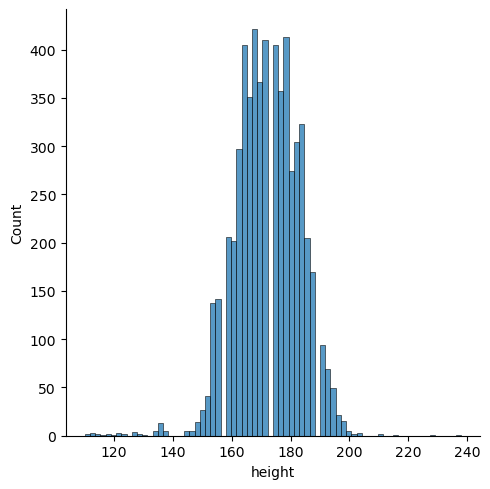

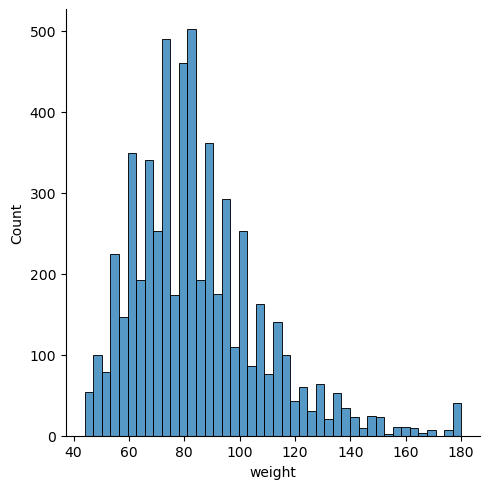

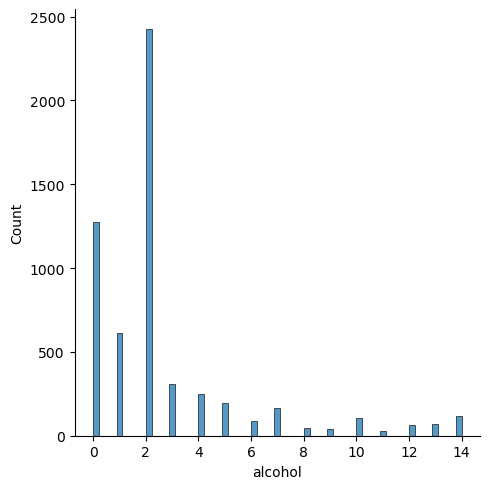

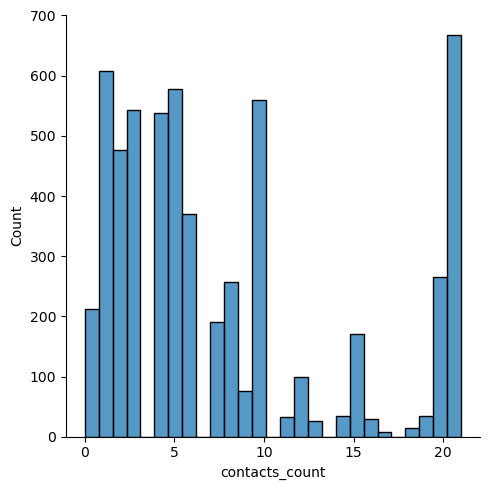

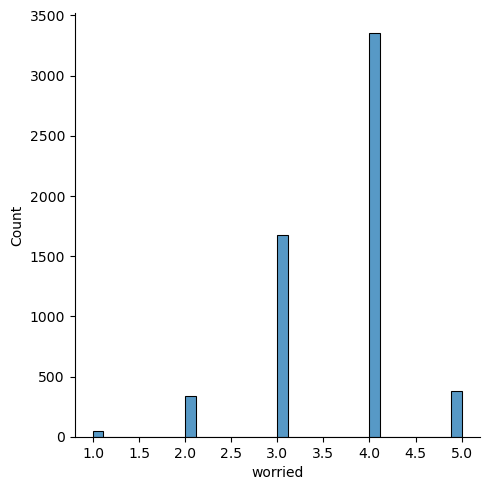

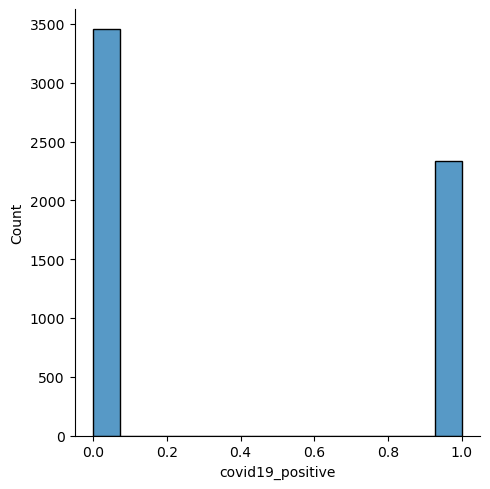

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

height_dis = sns.displot(d2['height'].dropna())
plt.show()

weight_dis= sns.displot(d2['weight'].dropna())
plt.show()

alcohol_dis = sns.displot(d2['alcohol'].dropna())
plt.show()

contacts_count_dis = sns.displot(d2['contacts_count'].dropna())
plt.show()

worried_dis = sns.displot(d2['worried'].dropna())
plt.show()

covid19_positive_dis = sns.displot(d2['covid19_positive'].dropna())
plt.show()

variables used: height, weight, alcohol, contacts_count, worried, co

avoiding binary and categorical variables as they can't be ordered - use k

Nothing missing from these variables as far as I can see

We will need to normalise these values otherwise the height and weight values will overdominate.


In [17]:
from sklearn.preprocessing import StandardScaler

# take 3 variables and drop the rest
d2_num = d2[['height', 'weight', 'alcohol', 'contacts_count', 'worried', 'covid19_positive']]

# convert to matrix
X = d2_num.to_numpy()

# scaling - x is scaled
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
from sklearn.cluster import KMeans
import numpy as np

# random
rs = np.random.randint(1, 100)

# list to save the clusters and cost
clusters_x = []
inertia_val_x = []

# this whole process should take a while
for k in range(1, 10, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(X)
    
    # append model to cluster list
    clusters_x.append(model)
    inertia_val_x.append(model.inertia_)

In [19]:
from sklearn.metrics import silhouette_score
print(clusters_x[2])
print("Silhouette score for k=3", silhouette_score(X, clusters_x[2].predict(X)))

print(clusters_x[3])
print("Silhouette score for k=4", silhouette_score(X, clusters_x[3].predict(X)))

print(clusters_x[4])
print("Silhouette score for k=5", silhouette_score(X, clusters_x[4].predict(X)))

print(clusters_x[5])
print("Silhouette score for k=6", silhouette_score(X, clusters_x[5].predict(X)))

print(clusters_x[6])
print("Silhouette score for k=7", silhouette_score(X, clusters_x[6].predict(X)))

print(clusters_x[7])
print("Silhouette score for k=8", silhouette_score(X, clusters_x[7].predict(X)))

print(clusters_x[8])
print("Silhouette score for k=8", silhouette_score(X, clusters_x[7].predict(X)))

KMeans(n_clusters=3, random_state=66)
Silhouette score for k=3 0.1746700626594414
KMeans(n_clusters=4, random_state=66)
Silhouette score for k=4 0.18988523201786414
KMeans(n_clusters=5, random_state=66)
Silhouette score for k=5 0.20333172781591582
KMeans(n_clusters=6, random_state=66)
Silhouette score for k=6 0.22173651419601942
KMeans(n_clusters=7, random_state=66)
Silhouette score for k=7 0.2128831059792388
KMeans(random_state=66)
Silhouette score for k=8 0.20858383126119717
KMeans(n_clusters=9, random_state=66)
Silhouette score for k=8 0.20858383126119717


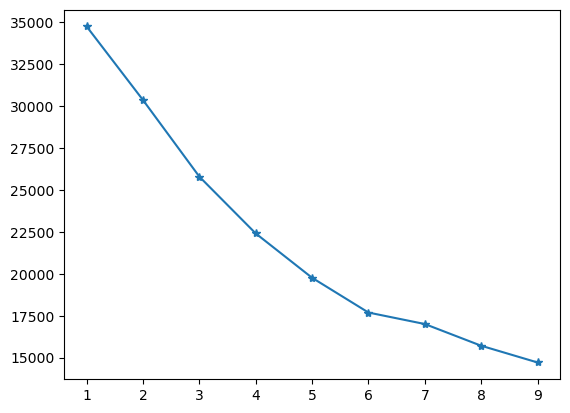

In [96]:
# plot the inertia vs K values
plt.plot(range(1,10,1), inertia_val_x, marker='*')
plt.savefig('kplot_norm.png', dpi=300)
plt.show()

elbow k = 6

In [22]:
from sklearn.cluster import KMeans
import numpy as np

d2_no_norm = d2[['height', 'weight', 'alcohol', 'contacts_count', 'worried', 'covid19_positive']]
Y = d2_no_norm.to_numpy()

# random
rs = np.random.randint(1, 100)

# list to save the clusters and cost
clusters_y = []
inertia_val_y = []

# this whole process should take a while
for k in range(1, 11, 1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(Y)
    
    # append model to cluster list
    clusters_y.append(model)
    inertia_val_y.append(model.inertia_)

In [23]:
from sklearn.metrics import silhouette_score

print(clusters_y[1])
print("Silhouette score for k=2", silhouette_score(Y, clusters_y[1].predict(Y)))

print(clusters_y[2])
print("Silhouette score for k=3", silhouette_score(Y, clusters_y[2].predict(Y)))

print(clusters_y[2])
print("Silhouette score for k=3", silhouette_score(Y, clusters_y[2].predict(Y)))

print(clusters_y[3])
print("Silhouette score for k=4", silhouette_score(Y, clusters_y[3].predict(Y)))

print(clusters_y[4])
print("Silhouette score for k=5", silhouette_score(Y, clusters_y[4].predict(Y)))

KMeans(n_clusters=2, random_state=54)
Silhouette score for k=2 0.4362495091648203
KMeans(n_clusters=3, random_state=54)
Silhouette score for k=3 0.35283953338092466
KMeans(n_clusters=3, random_state=54)
Silhouette score for k=3 0.35283953338092466
KMeans(n_clusters=4, random_state=54)
Silhouette score for k=4 0.29867847806640896
KMeans(n_clusters=5, random_state=54)
Silhouette score for k=5 0.2527740335571503


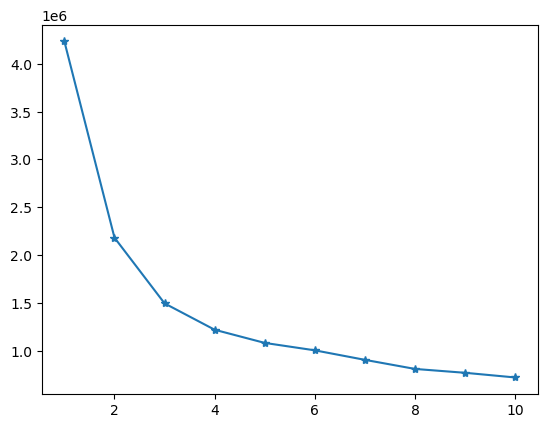

In [99]:
# plot the inertia vs K values
plt.plot(range(1,11,1), inertia_val_y, marker='*')
plt.savefig('kplot.png', dpi=300) 
plt.show()

elbow k = 2

In [78]:
from sklearn.cluster import KMeans

rs = np.random.randint(1, 100)

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=6, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 17688.423190236288
Centroid locations:
[ 0.14756978 -0.25152162 -0.24672461 -0.16977189 -1.27692667 -0.71244669]
[-0.14524709 -0.14556804 -0.22672635  1.79889193  0.05111976  0.26269649]
[-0.11170364 -0.30254146 -0.24180622 -0.48173158  0.7080236  -0.82220909]
[ 0.08945115  0.11345831  2.84257436 -0.05818716 -0.04432253  0.17248057]
[-0.36854165 -0.28726997 -0.27173748 -0.51396749  0.25871475  1.21623564]
[ 0.82876678  1.86262402 -0.21345751 -0.13419081  0.20184202  0.47976528]


/var/folders/0f/lv0rcd_j10v0y838kmp0sj640000gn/T/ipykernel_96556/2314794569.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_num['Cluster_ID'] = y


Cluster membership
Cluster_ID
2    1468
4    1174
0    1170
1     900
5     620
3     457
Name: count, dtype: int64


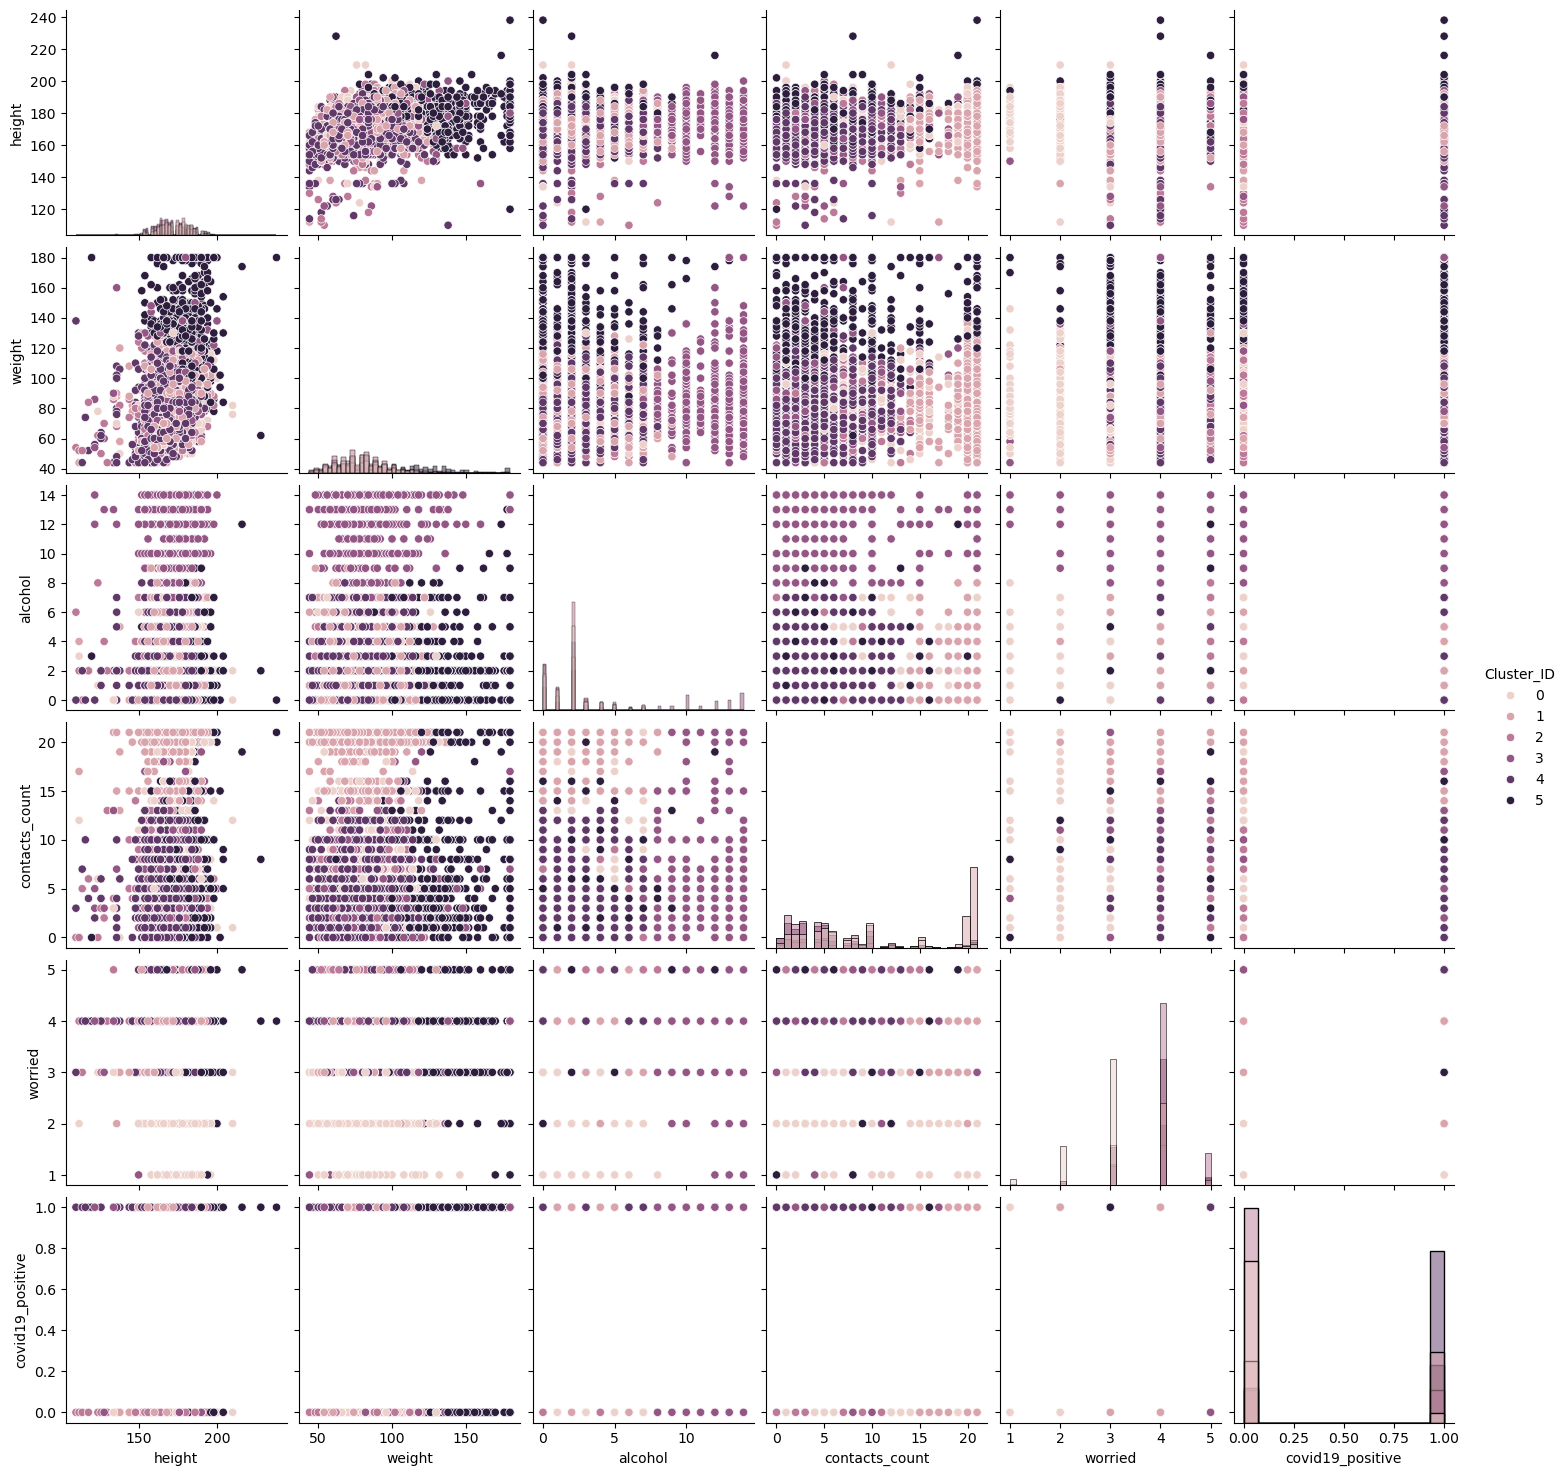

In [82]:
model = KMeans(n_clusters=6, random_state=rs).fit(X)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
d2_num['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(d2_num['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_vis = sns.pairplot(d2_num, hue='Cluster_ID',diag_kind='hist')
plt.show()

cluster_vis.savefig("kmeans_clustering.png", dpi=300)

- taller folks are generally less worried, generally drink less, and are less likely to be covid positive (cluster 0)
- lighter folks have a lower contacts_count
- heavier folks are more likely to have covid
- not a lot of cluster variation between those who have/don't have CoVid-19
    - I do note that cluster 5 represents a population that is more likely to be covid 19 negative with fewer contact-counts, which makes sense

Distribution for cluster 0
Means for Cluster 0:
  height: 173.64
  weight: 78.84
  alcohol: 1.90
  contacts_count: 6.78
  worried: 2.71
  covid19_positive: 0.05


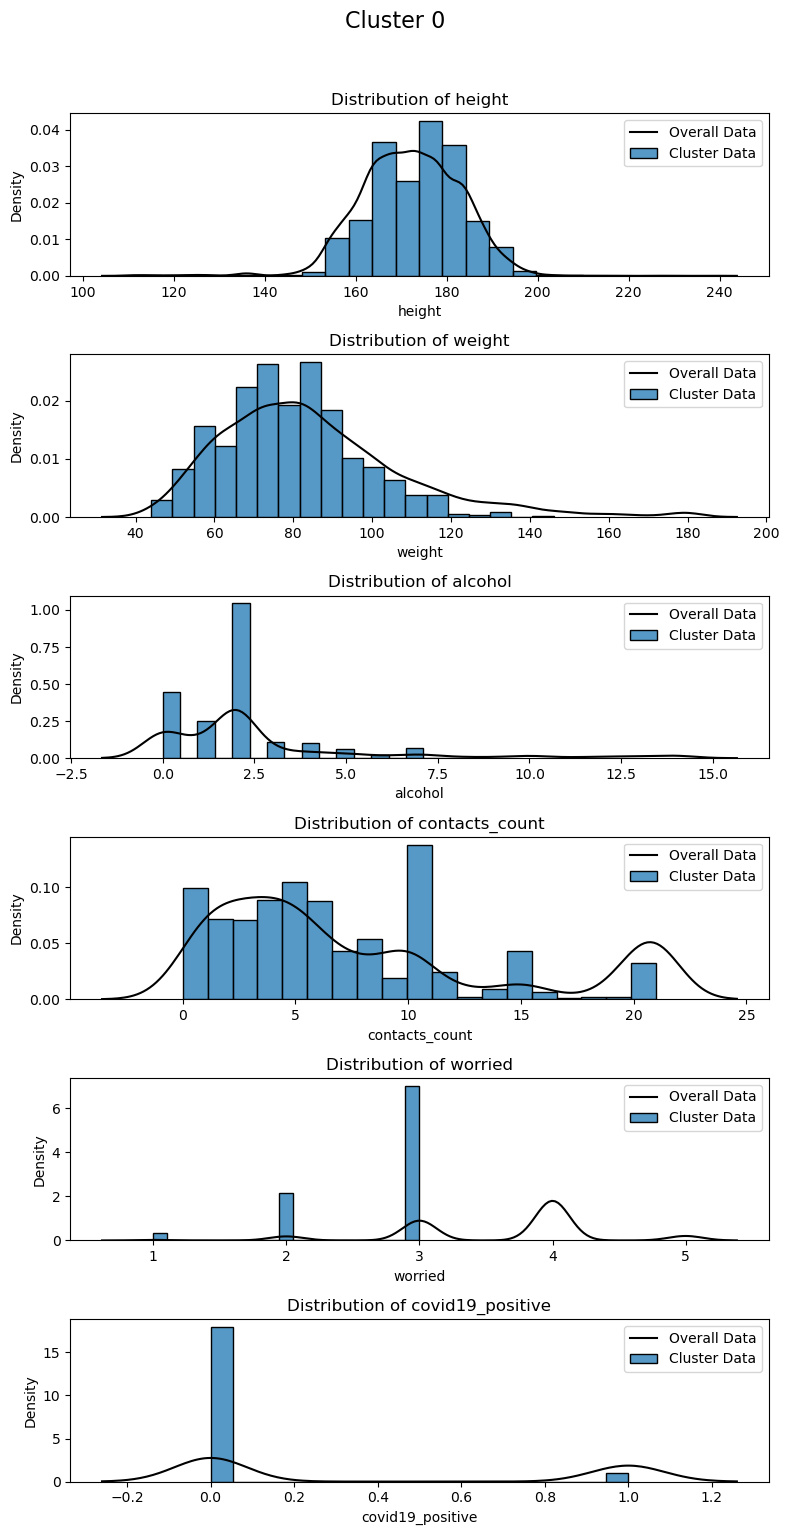

Distribution for cluster 1
Means for Cluster 1:
  height: 170.44
  weight: 81.34
  alcohol: 1.97
  contacts_count: 20.05
  worried: 3.67
  covid19_positive: 0.53


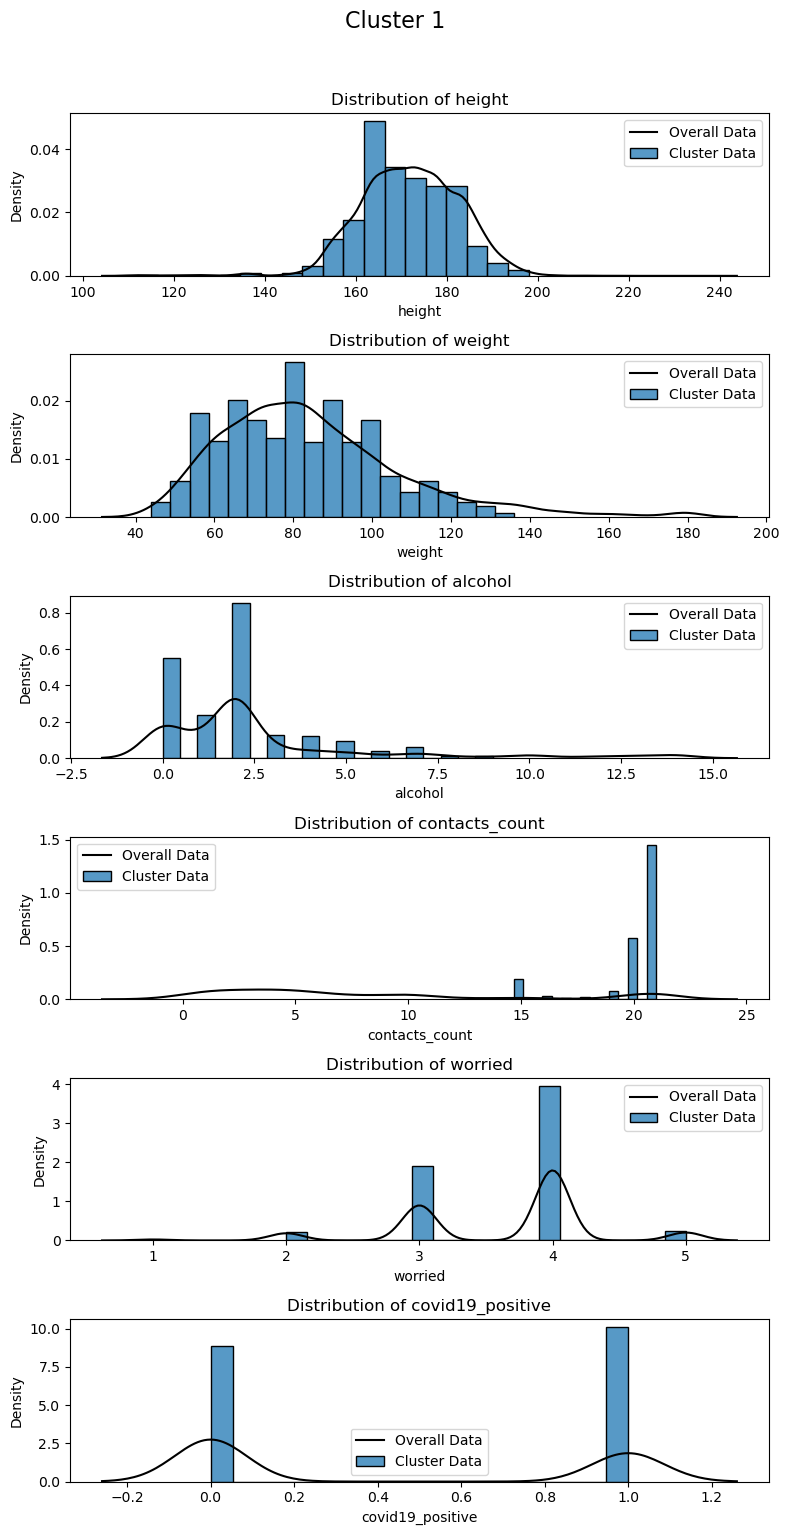

Distribution for cluster 2
Means for Cluster 2:
  height: 170.81
  weight: 77.64
  alcohol: 1.92
  contacts_count: 4.68
  worried: 4.15
  covid19_positive: 0.00


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


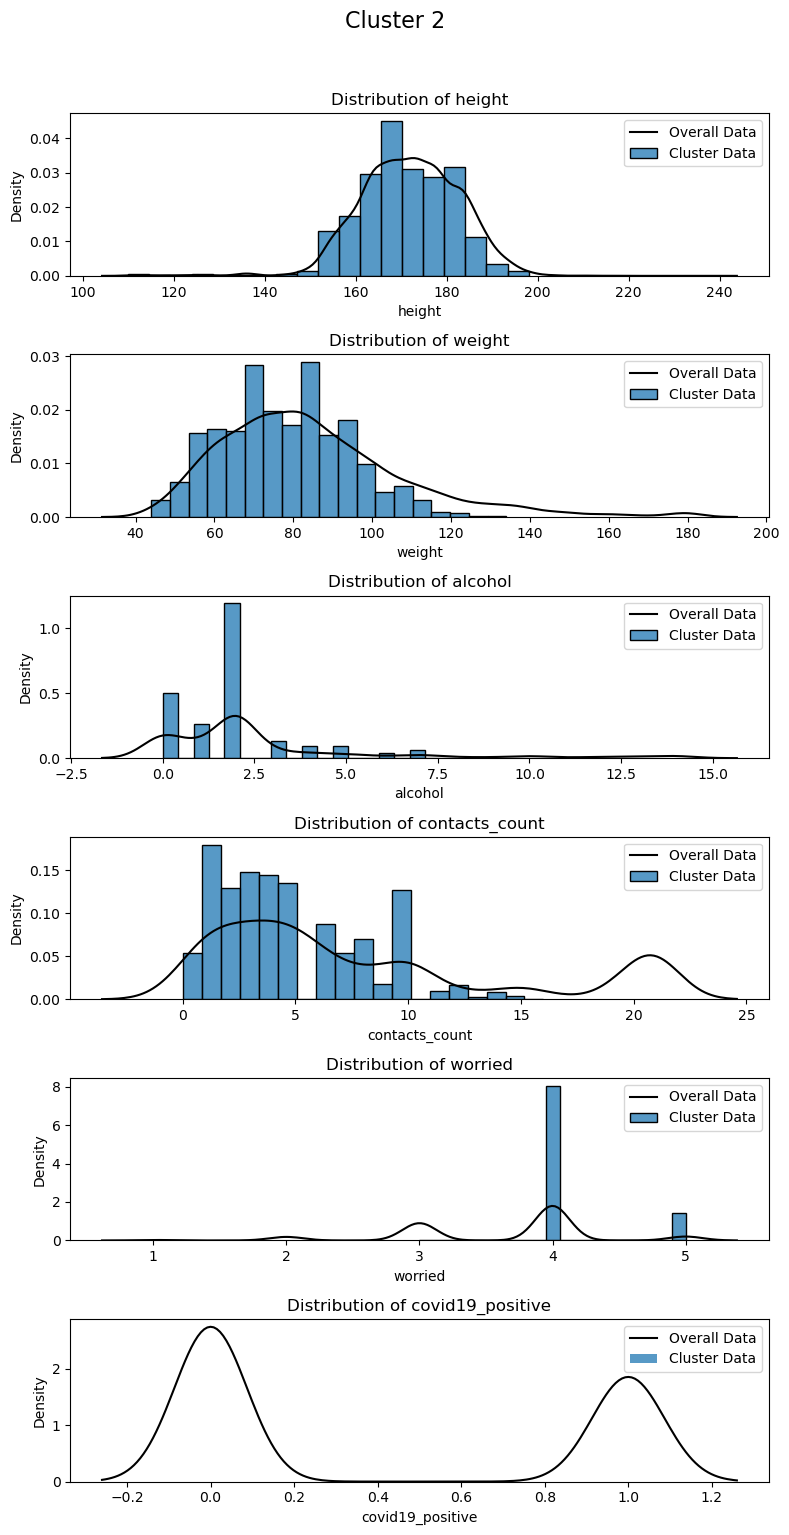

Distribution for cluster 3
Means for Cluster 3:
  height: 173.01
  weight: 87.45
  alcohol: 11.54
  contacts_count: 7.53
  worried: 3.60
  covid19_positive: 0.49


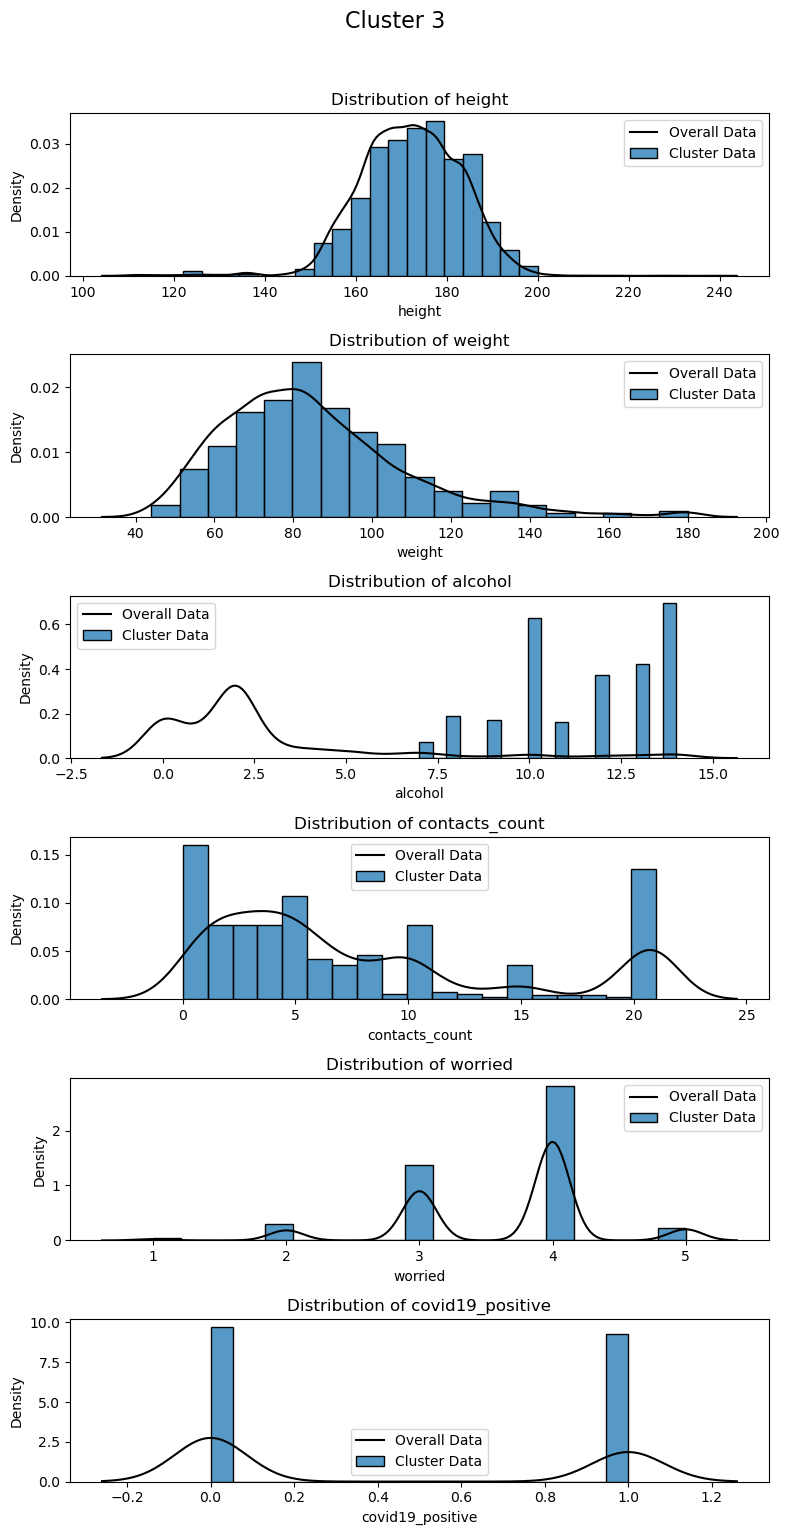

Distribution for cluster 4
Means for Cluster 4:
  height: 168.01
  weight: 78.00
  alcohol: 1.83
  contacts_count: 4.46
  worried: 3.82
  covid19_positive: 1.00


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


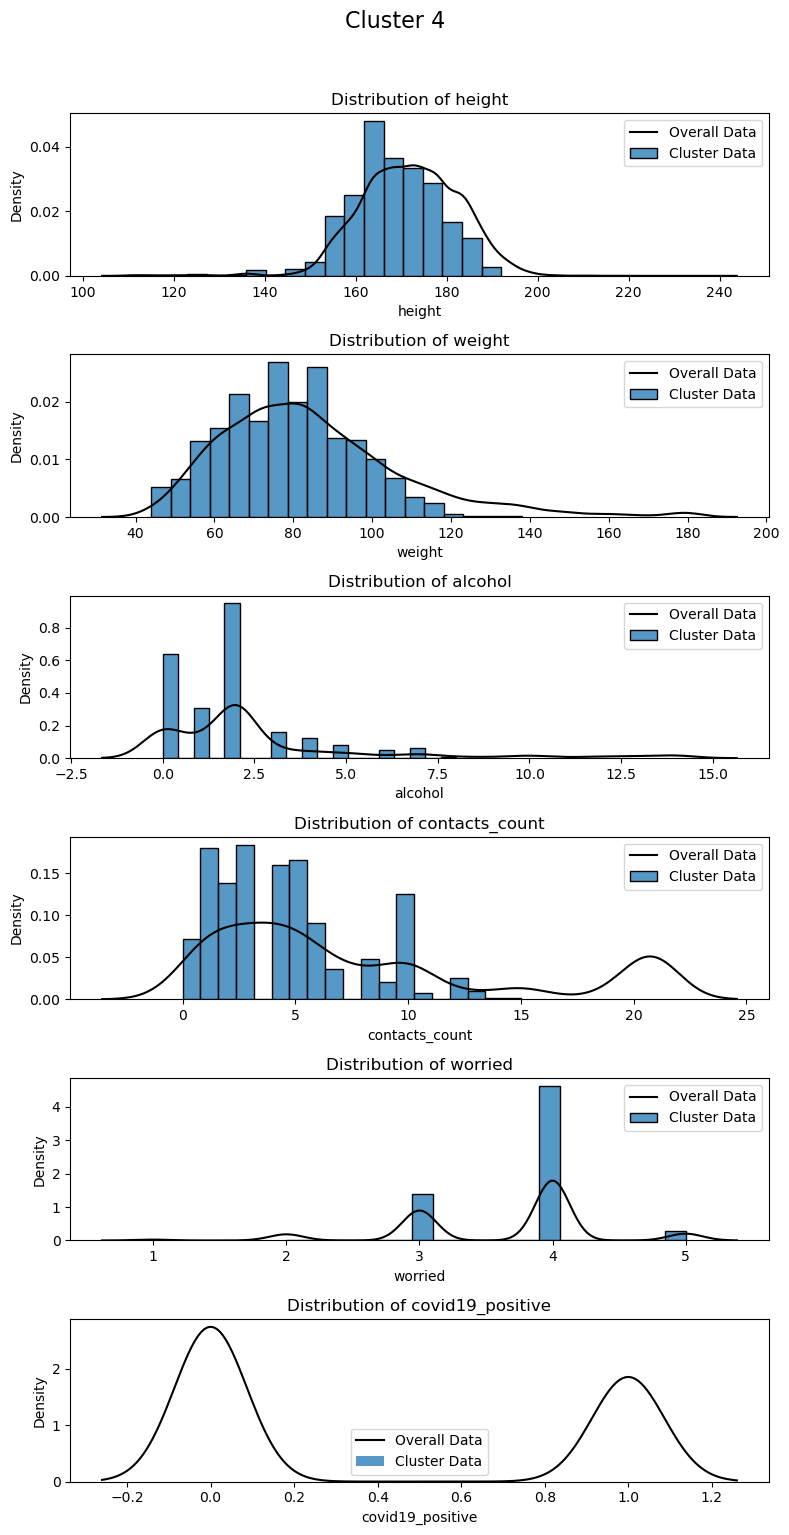

Distribution for cluster 5
Means for Cluster 5:
  height: 181.08
  weight: 128.68
  alcohol: 2.01
  contacts_count: 7.02
  worried: 3.78
  covid19_positive: 0.64


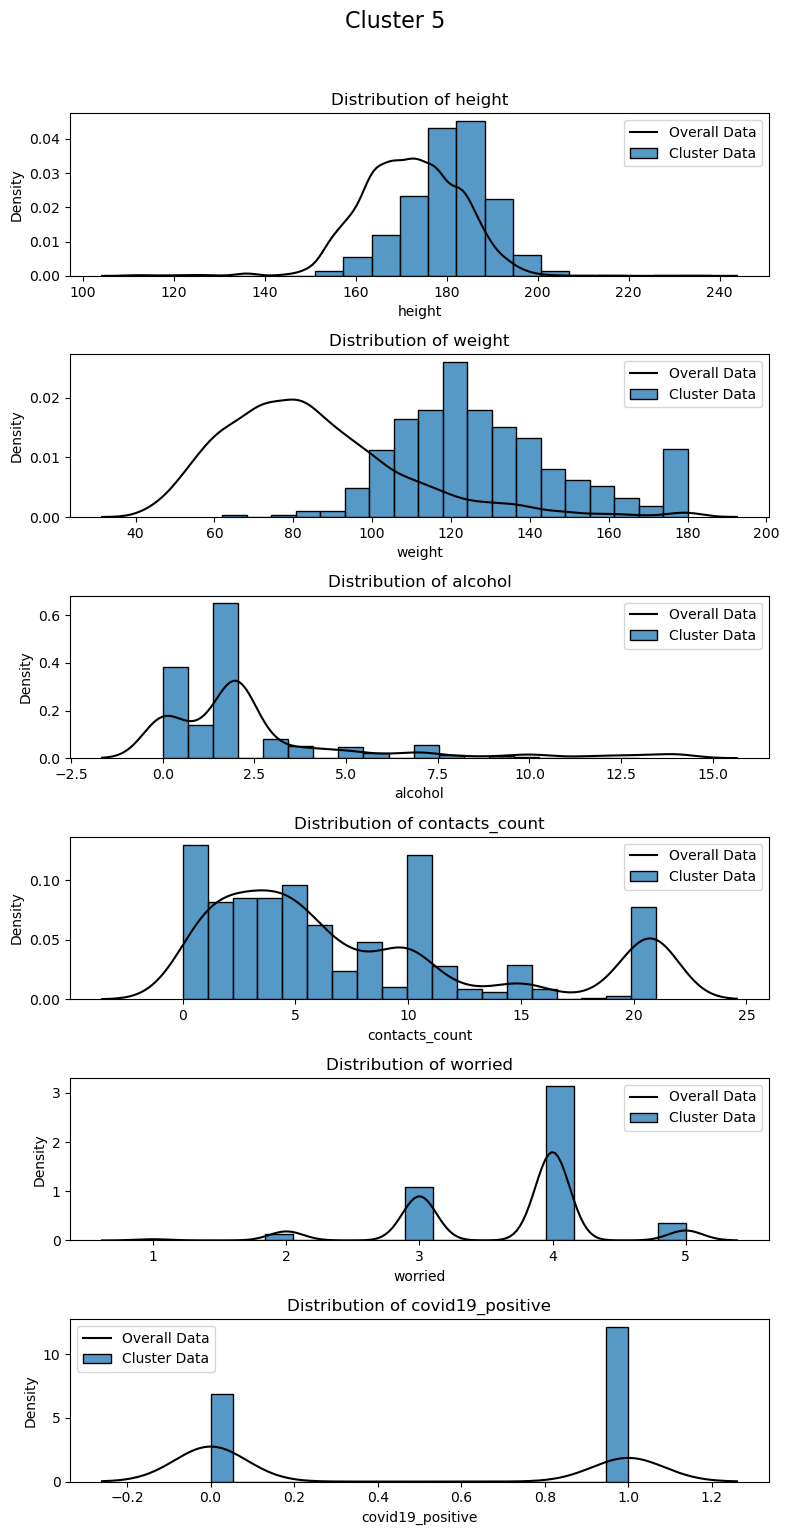

In [188]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['height', 'weight', 'alcohol', 'contacts_count', 'worried', 'covid19_positive']
n_bins = 20

# inspecting clusters
clusters_to_inspect = [0, 1, 2, 3, 4, 5]

for cluster in clusters_to_inspect:
    print(f"Distribution for cluster {cluster}")

    # Filter the data for the current cluster
    cluster_data = d2_num[d2_num['Cluster_ID'] == cluster]

    # Calculate and print the mean for each characteristic
    print(f"Means for Cluster {cluster}:")
    for col in cols:
        mean_value = cluster_data[col].mean()
        print(f"  {col}: {mean_value:.2f}")

    # Create subplots
    fig, axes = plt.subplots(nrows=len(cols), figsize=(8, 15))
    fig.suptitle(f"Cluster {cluster}", fontsize=16, y=1.02)

    for j, col in enumerate(cols):
        
        # Filter data for the current cluster
        cluster_data_col = cluster_data[col]
        if cluster_data_col.empty:
            print(f"No data for cluster {cluster} and column {col}.")
            continue

        # Create the bins
        bins = np.linspace(cluster_data_col.min(), cluster_data_col.max(), n_bins)

        # Plot distribution of the cluster using a histogram
        sns.histplot(cluster_data_col, bins=bins, ax=axes[j], stat="density", kde=False, label="Cluster Data")

        # Plot the normal distribution (overall data) with a black line
        sns.kdeplot(d2_num[col], ax=axes[j], color="k", label="Overall Data")

        # Add labels and legend
        axes[j].set_title(f"Distribution of {col}")
        axes[j].legend()

    plt.tight_layout()
    plt.savefig(f"kmeans_cluster_{cluster}_dist.png", dpi=300)
    plt.show()

In [121]:
# Define the cluster ID you want to inspect
cluster_id_to_print = 2  # Change this to the desired cluster ID

# Filter the data for the specified cluster
cluster_data = d2_num[d2_num['Cluster_ID'] == cluster_id_to_print]

# Print the rows for the specified cluster
if cluster_data.empty:
    print(f"No data found for cluster {cluster_id_to_print}.")
else:
    print(f"Data for Cluster {cluster_id_to_print}:")
    print(cluster_data['covid19_positive'].value_counts())

Data for Cluster 2:
covid19_positive
0    1468
Name: count, dtype: int64


In [123]:
# Define the cluster ID you want to inspect
cluster_id_to_print = 4  # Change this to the desired cluster ID

# Filter the data for the specified cluster
cluster_data = d2_num[d2_num['Cluster_ID'] == cluster_id_to_print]

# Print the rows for the specified cluster
if cluster_data.empty:
    print(f"No data found for cluster {cluster_id_to_print}.")
else:
    print(f"Data for Cluster {cluster_id_to_print}:")
    print(cluster_data['covid19_positive'].value_counts())

Data for Cluster 4:
covid19_positive
1    1174
Name: count, dtype: int64


In [30]:
# adding in age

d2['age'].value_counts()
d2['age'].describe()


print(d2.isna().sum()) 

gender              0
age                 0
height              0
weight              0
blood_type          0
insurance           0
income              0
smoking             0
alcohol             0
contacts_count      0
working             0
worried             0
covid19_positive    0
dtype: int64


In [31]:
# mapping age to numerical values

d2_age = d2[['age','height', 'weight', 'alcohol', 'contacts_count', 'worried', 'covid19_positive']].copy()
age_map = {'0_10':1, '10_20':2, '20_30': 3, '30_40': 4, '40_50': 5, '50_60': 6, '60_70': 7, '70_80': 8, '80-90': 9, '90_100': 10, '100_110': 11}
d2_age['age'] = d2['age'].map(age_map)


print(d2_age.isna().sum()) 

age                 0
height              0
weight              0
alcohol             0
contacts_count      0
worried             0
covid19_positive    0
dtype: int64


In [32]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

# convert df to matrix
Z = d2_age.to_numpy()

# scaling
scaler = StandardScaler()
Z = scaler.fit_transform(Z)

rs = np.random.randint(1, 100)

# list to save the clusters and cost
clusters_z = []
cost_vals_z = []

# this whole process should take a while
for k in range(1, 15, 1):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(Z, categorical=[0])
    
    # append model to cluster list
    clusters_z.append(model)
    cost_vals_z.append(model.cost_)

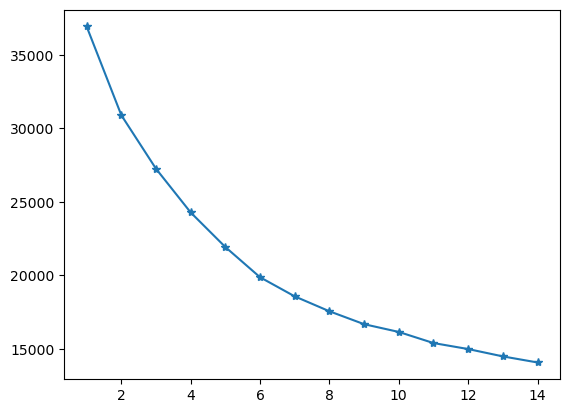

In [33]:
# plot the cost vs K values
plt.plot(range(1,15,1), cost_vals_z, marker='*')
plt.show()

In [34]:
Z_num = [[row[1], row[2], row[3], row[4], row[5]] for row in Z] # Variables of X with numeric datatype
Z_cat = [[row[0]] for row in Z] # variables of X with categorical datatype

model = clusters_z[3] # K=4

from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(Z_num, model.fit_predict(Z,categorical=[0]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))

silScoreCats = silhouette_score(Z_cat, model.fit_predict(Z,categorical=[0]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

Silscore for numeric variables: 0.08091613742962882
Silscore for categorical variables: -0.025500294146665898
The avg silhouette score for k=4: 0.02770792164148146


In [35]:
model = clusters_z[4] # K=5

from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(Z_num, model.fit_predict(Z,categorical=[0]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))

silScoreCats = silhouette_score(Z_cat, model.fit_predict(Z,categorical=[0]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=5: " + str(silScore))

Silscore for numeric variables: 0.09135960326749737
Silscore for categorical variables: -0.04180184470650062
The avg silhouette score for k=5: 0.024778879280498375


In [36]:
model = clusters_z[5] # K=6

from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(Z_num, model.fit_predict(Z,categorical=[0]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))

silScoreCats = silhouette_score(Z_cat, model.fit_predict(Z,categorical=[0]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=6: " + str(silScore))

Silscore for numeric variables: 0.10962988334166272
Silscore for categorical variables: -0.043898749977822435
The avg silhouette score for k=6: 0.032865566681920144


In [37]:
model = clusters_z[6] # K=7

from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(Z_num, model.fit_predict(Z,categorical=[0]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))

silScoreCats = silhouette_score(Z_cat, model.fit_predict(Z,categorical=[0]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=7: " + str(silScore))

Silscore for numeric variables: 0.10393182227478458
Silscore for categorical variables: -0.04427686330719727
The avg silhouette score for k=7: 0.029827479483793655


elbow is k=6.

Sum of intra-cluster distance: 19876.435038084015
Centroid locations:
[ 0.1633516  -0.24862606 -0.24790043 -0.17565235 -1.27671524 -0.71473707
  0.05627499]
[-0.12680835 -0.30876897 -0.2401087  -0.48466496  0.7037457  -0.82220909
 -0.56901471]
[-0.37590485 -0.29089833 -0.27307243 -0.51532579  0.25648989  1.21623564
 -0.56901471]
[ 0.84134431  1.8199522  -0.22489106 -0.08541714  0.21454573  0.48464658
 -0.56901471]
[ 0.09447458  0.11582565  2.84506449 -0.06029128 -0.05155952  0.1746619
 -0.56901471]
[-0.17463785 -0.17905427 -0.21676262  1.79647706  0.03366599  0.24053063
 -0.56901471]
Cluster membership
Cluster_ID
1    1465
2    1169
0    1157
5     890
3     652
4     456
Name: count, dtype: int64


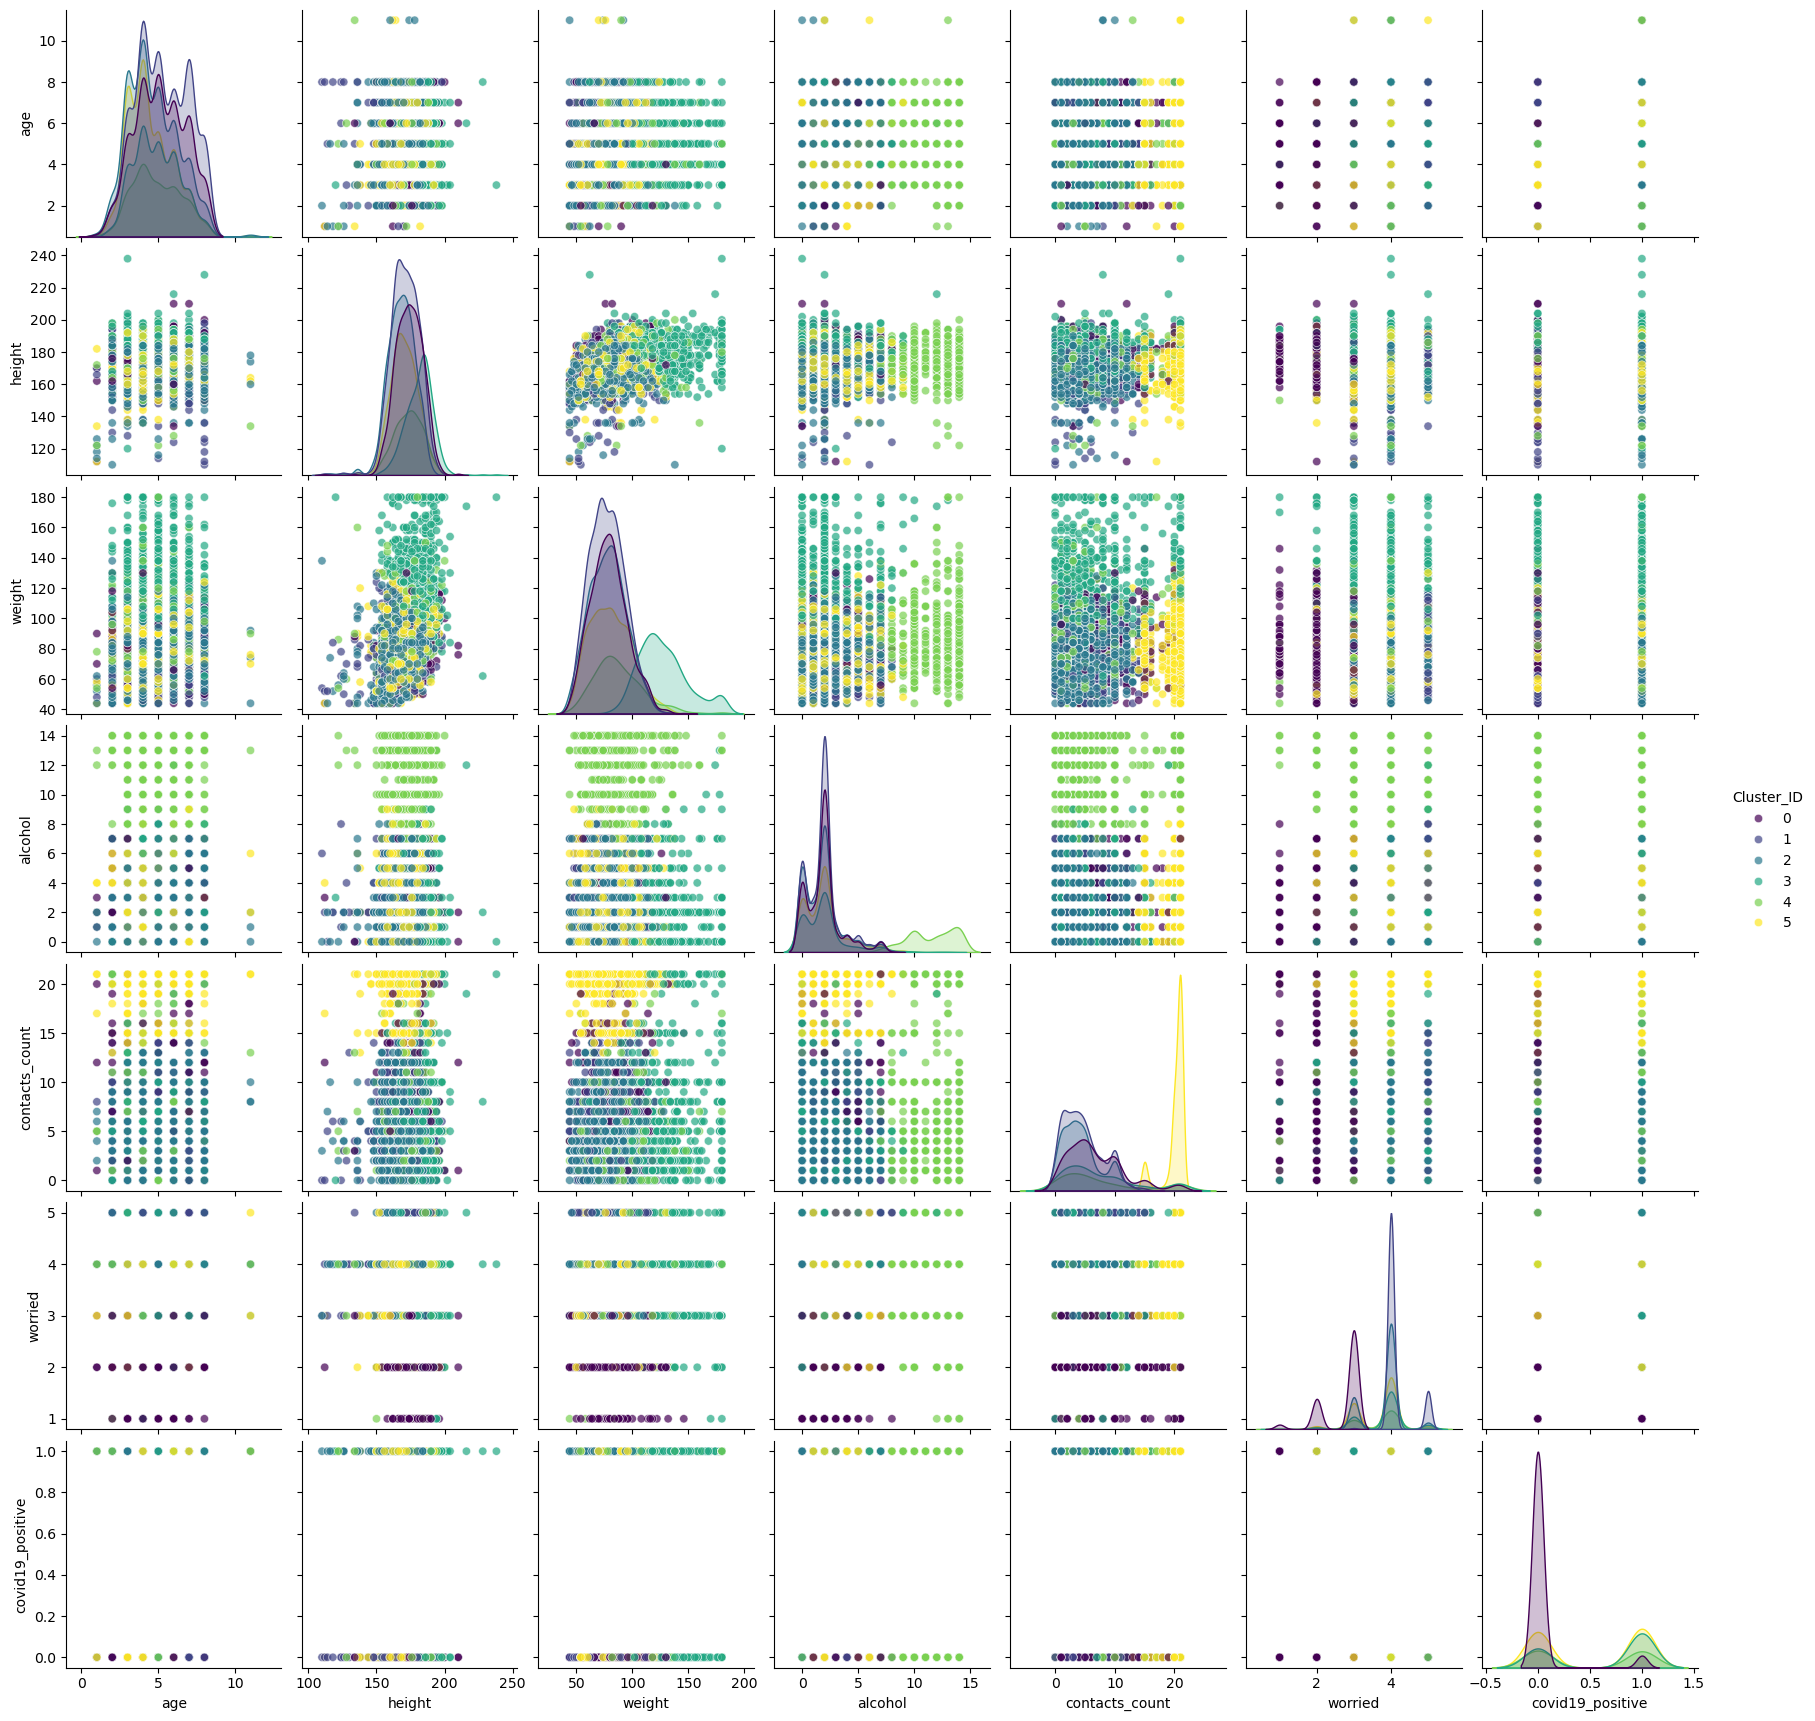

In [129]:
# visualisation of K=5 clustering solution
model = KPrototypes(n_clusters=6, random_state=rs, n_jobs=10)
model.fit(Z, categorical=[0])

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.cost_)

print("Centroid locations:")
for i, centroid in enumerate(model.cluster_centroids_):
    print(centroid);

y = model.predict(Z, categorical=[0])
d2_age['Cluster_ID'] = y

# how many in each
print("Cluster membership")
print(d2_age['Cluster_ID'].value_counts())

# Visualization using pairplot
sns.pairplot(
    d2_age,
    hue='Cluster_ID',
    palette='viridis',
    diag_kind='kde',
    plot_kws={'alpha': 0.7}
)
plt.savefig('kprototype_clustering.png', dpi=300)
plt.show()

In [40]:
d2_age

age  height  weight  alcohol  contacts_count  worried  covid19_positive  \
0       3     188     104        0               9        3                 1   
1       8     164      62        0               2        3                 1   
2       5     164      78        2               5        3                 1   
3       5     170      60        2               6        3                 1   
4       4     164      64        2               2        4                 1   
...   ...     ...     ...      ...             ...      ...               ...   
5784    5     184      94        3               3        4                 1   
5785    3     168      60        2              20        4                 0   
5786    3     160      54        2              20        3                 0   
5787    5     190     138        2              10        3                 1   
5788    6     172      96        2              21        4                 1   

      Cluster_ID  
0              1  
1              2  
2              2  
3              2  
4              2  
...          ...  
5784           2  
5785           4  
5786           4  
5787           1  
5788           4  

[5789 rows x 8 columns]

In [141]:
list(age_map.keys())

['0_10',
 '10_20',
 '20_30',
 '30_40',
 '40_50',
 '50_60',
 '60_70',
 '70_80',
 '80-90',
 '90_100',
 '100_110']

Distribution for cluster 0


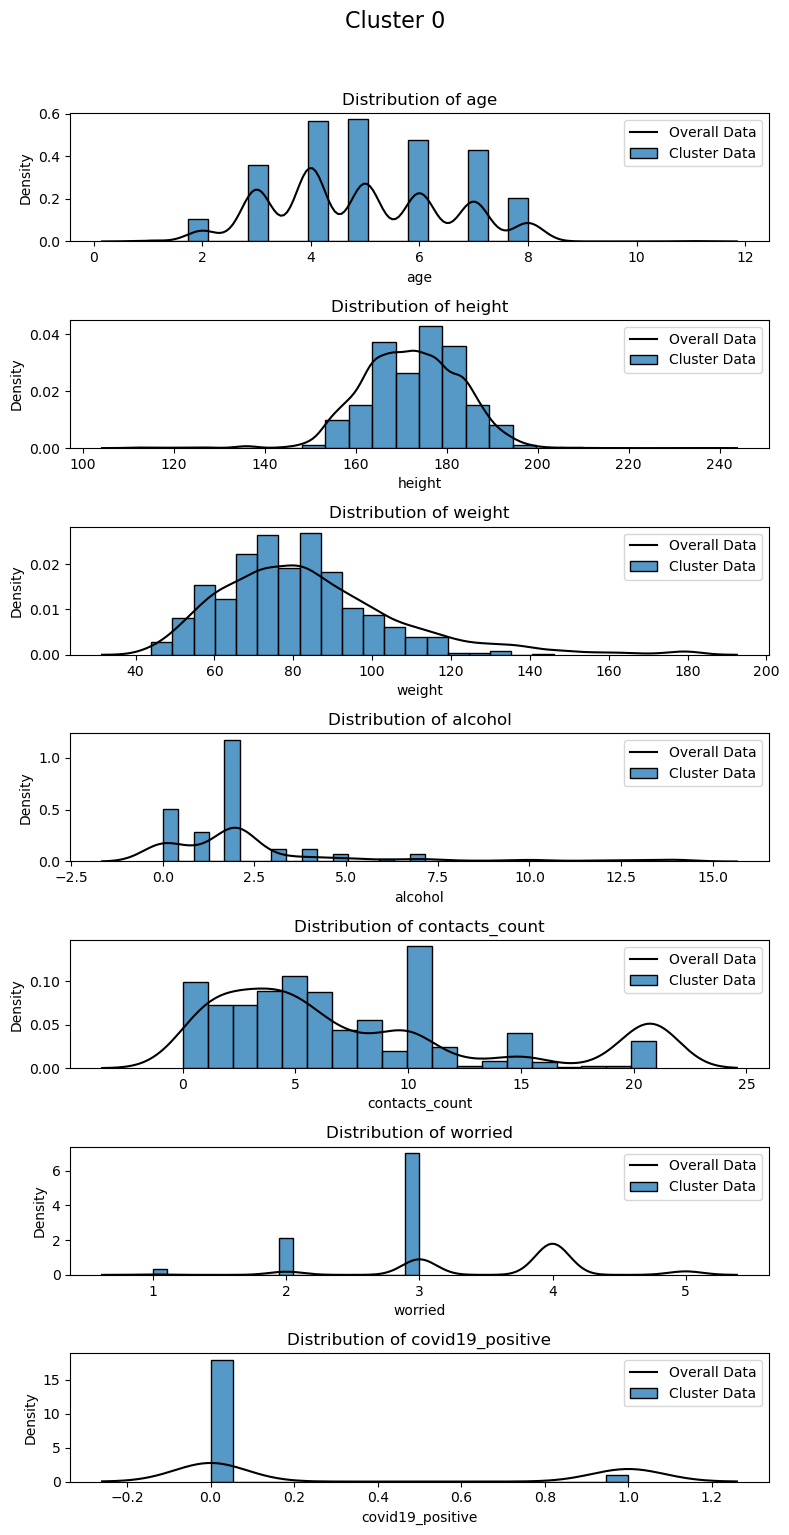

Distribution for cluster 1


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


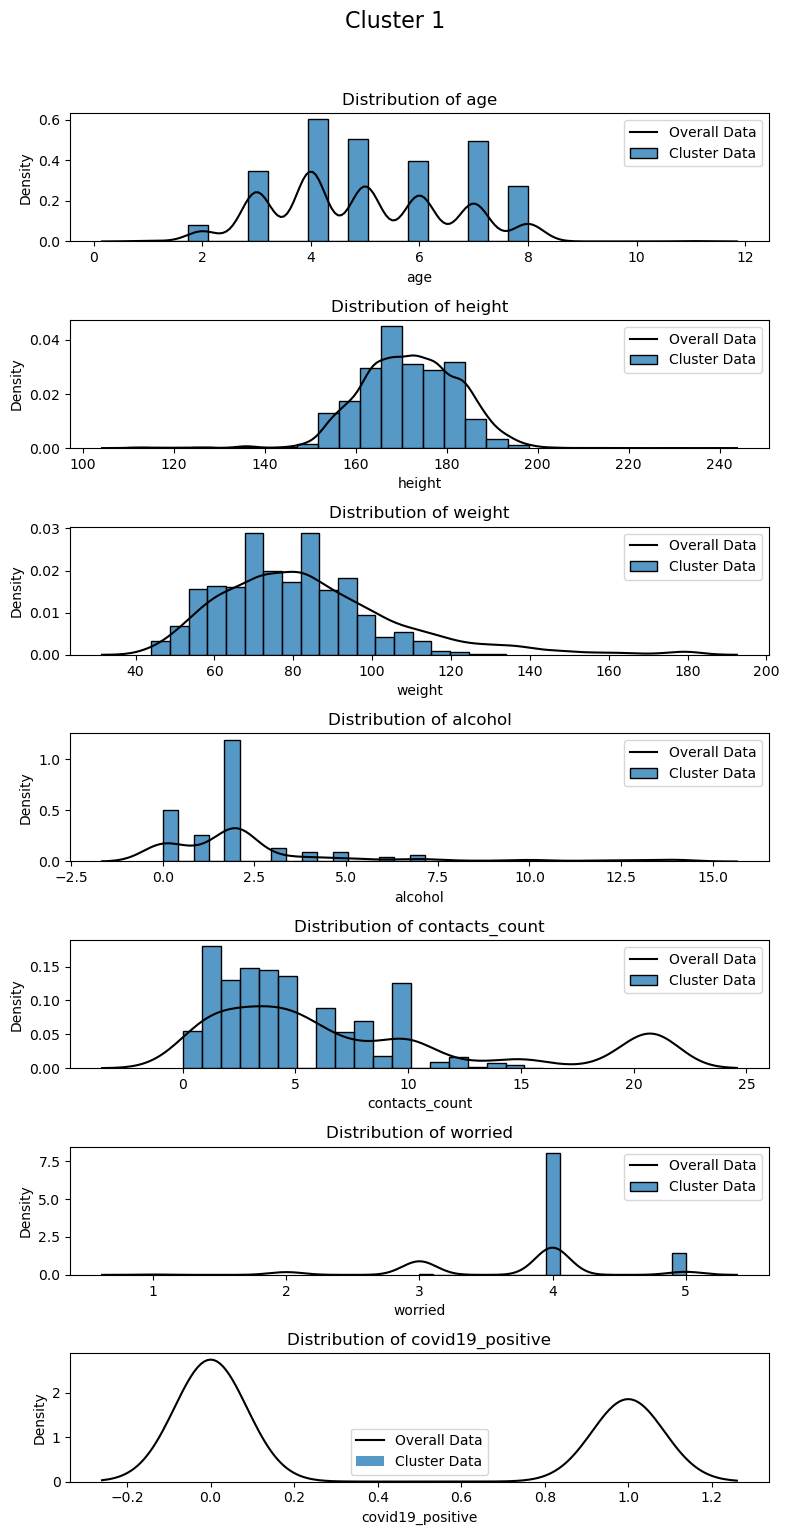

Distribution for cluster 2


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


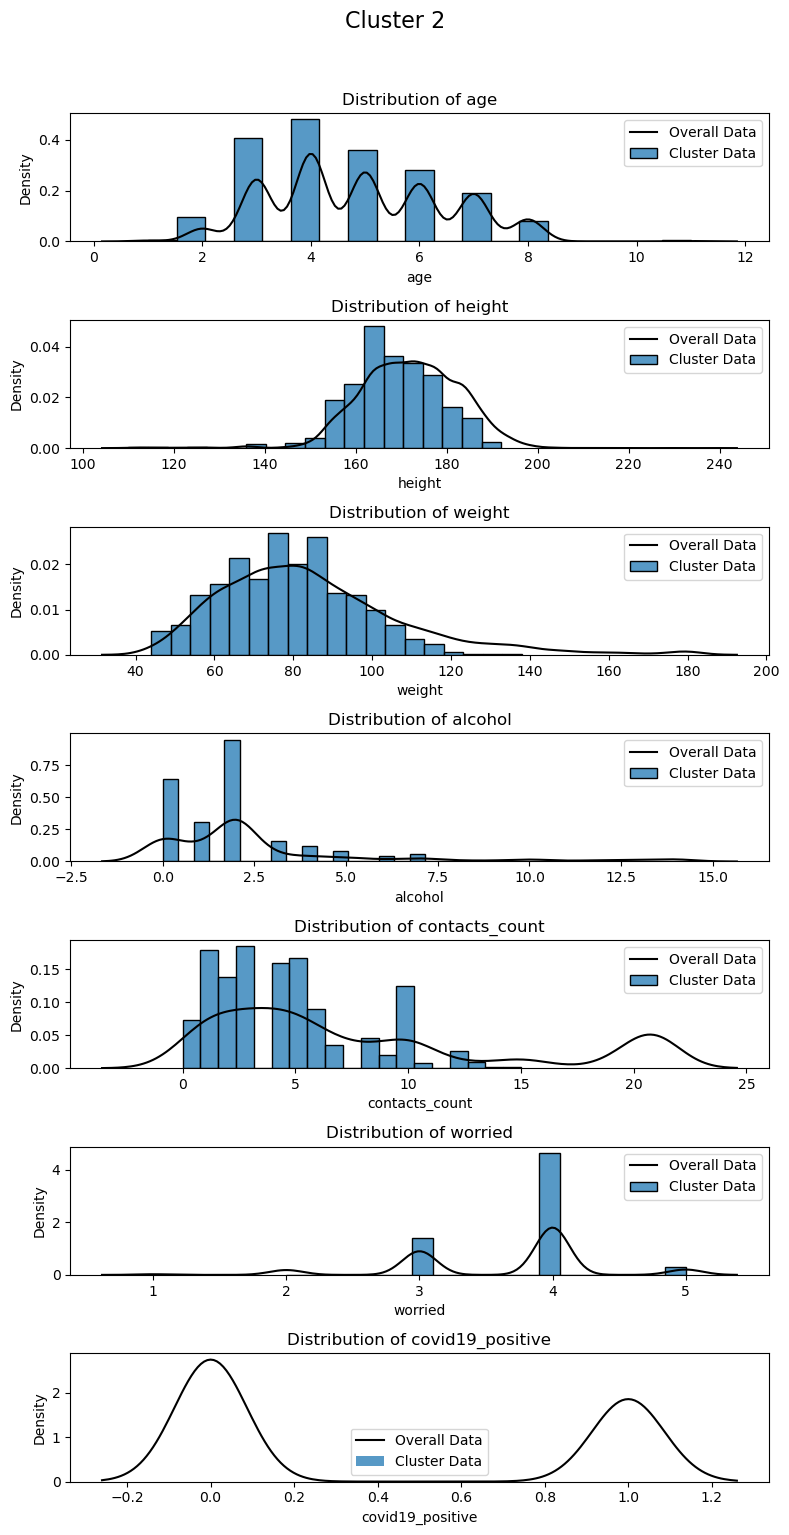

Distribution for cluster 3


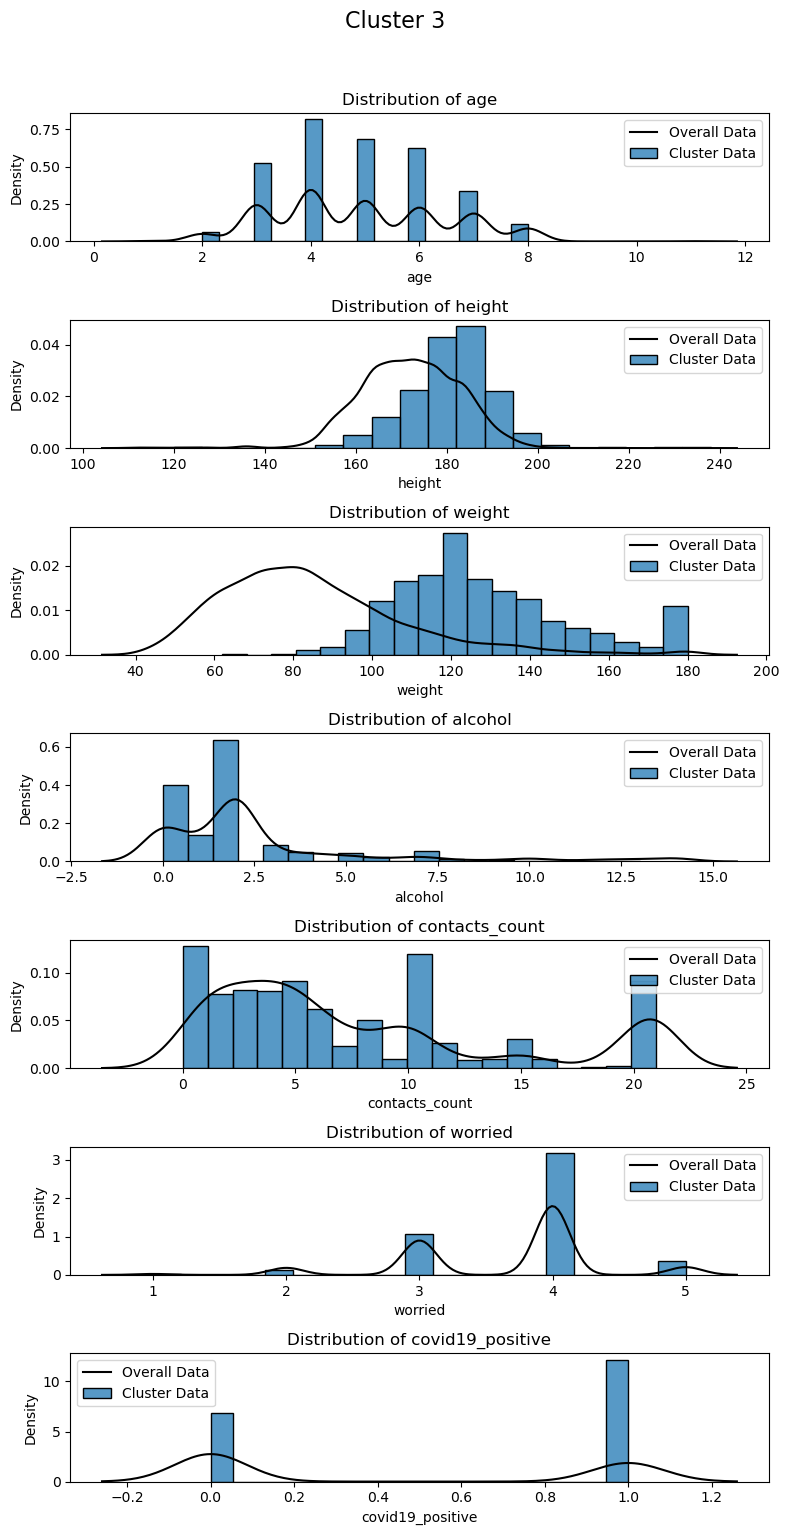

Distribution for cluster 4


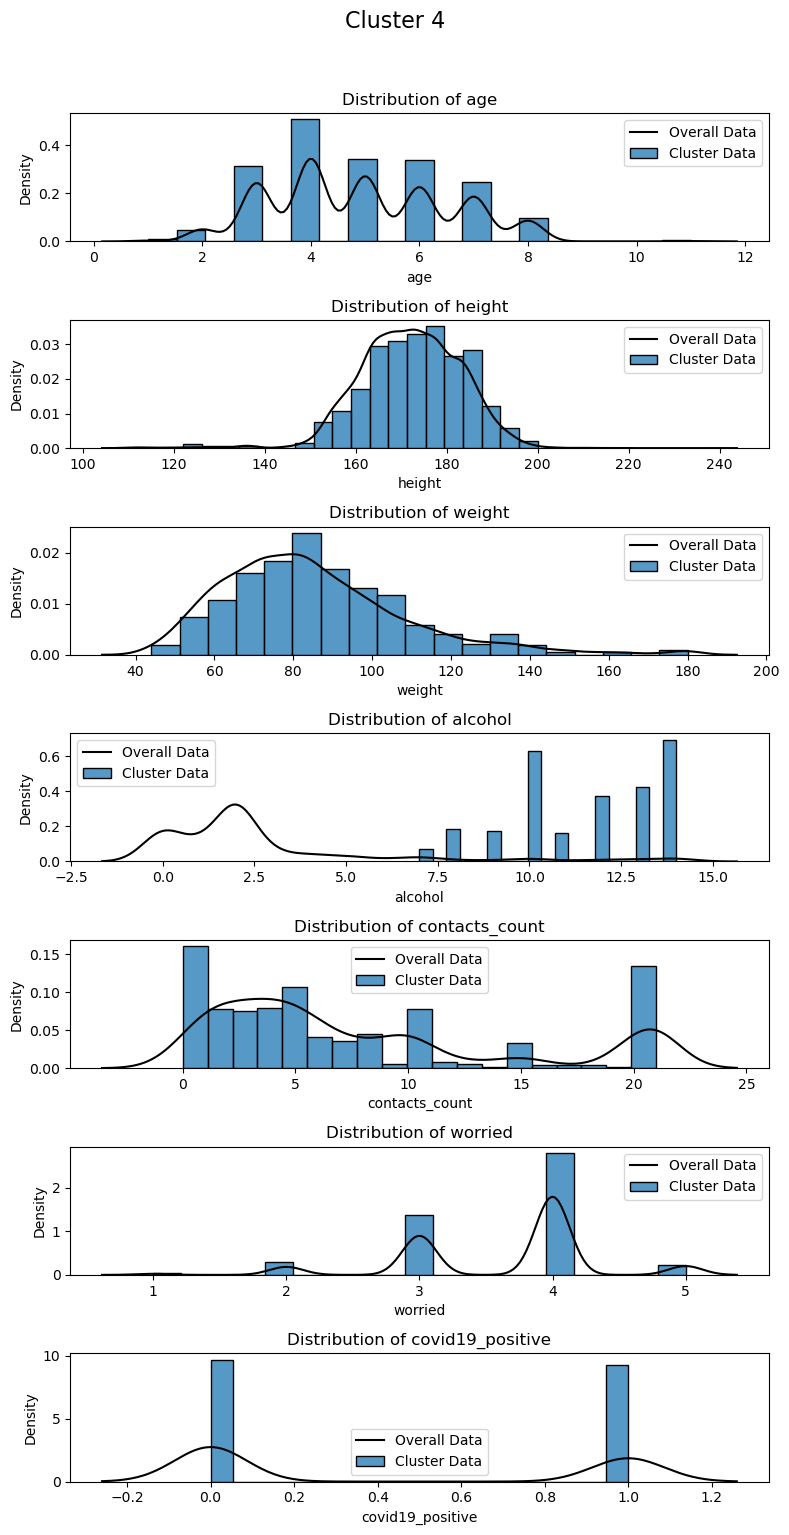

Distribution for cluster 5


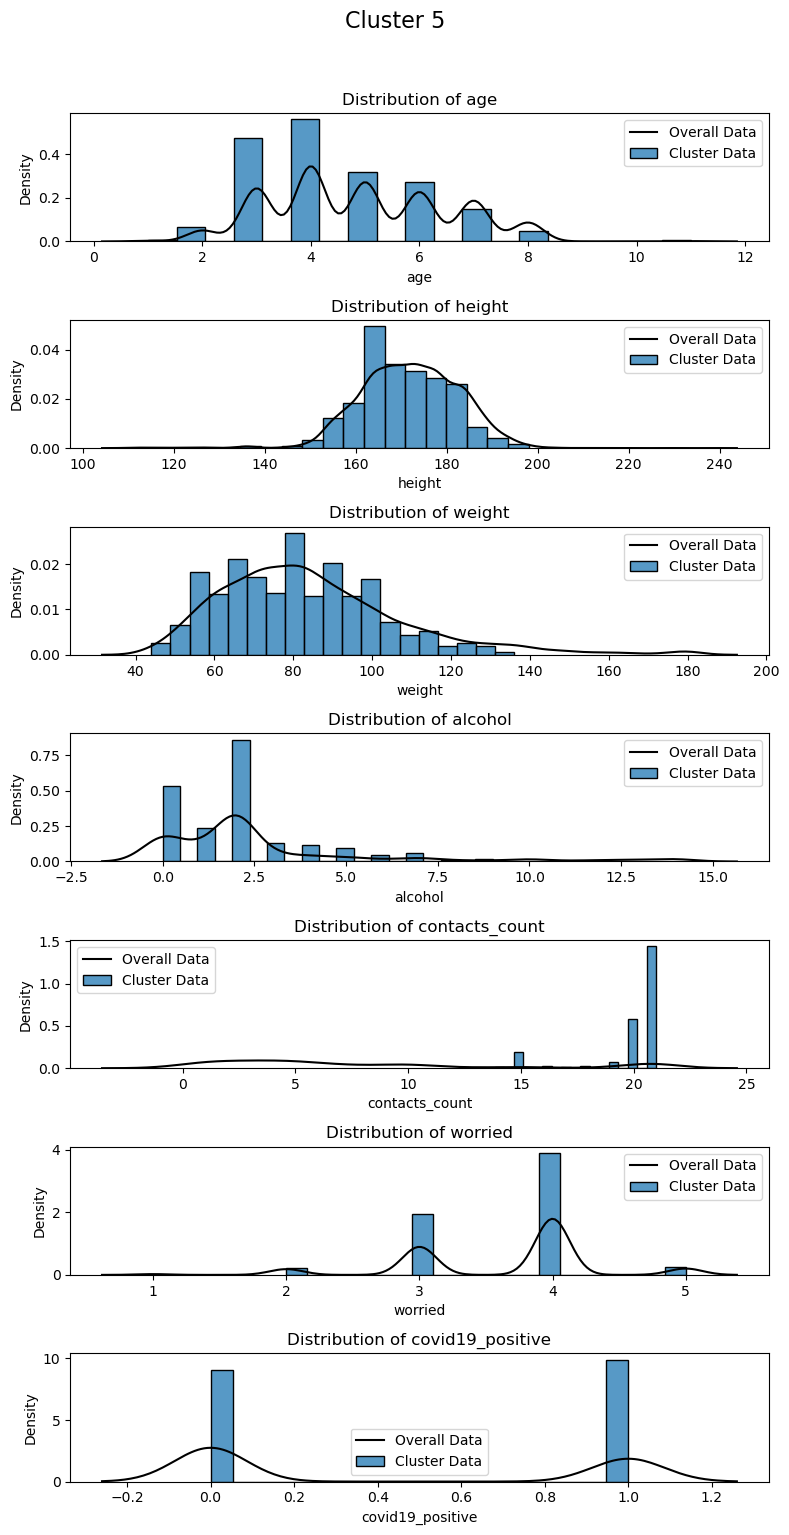

In [202]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['age','height', 'weight', 'alcohol', 'contacts_count', 'worried', 'covid19_positive']
n_bins = 20

# inspecting clusters
clusters_to_inspect = [0,1,2,3,4,5]

for cluster in clusters_to_inspect:
    print(f"Distribution for cluster {cluster}")

    # Create subplots
    fig, axes = plt.subplots(nrows=len(cols), figsize=(8, 15))
    fig.suptitle(f"Cluster {cluster}", fontsize=16, y=1.02)

    for j, col in enumerate(cols):
        # Filter data for the current cluster
        cluster_data = d2_age[d2_age['Cluster_ID'] == cluster][col]
        if cluster_data.empty:
            print(f"No data for cluster {cluster} and column {col}.")
            continue

        # Create the bins
        bins = np.linspace(cluster_data.min(), cluster_data.max(), n_bins)

        # Plot distribution of the cluster using a histogram
        sns.histplot(cluster_data, bins=bins, ax=axes[j], stat="density", kde=False, label="Cluster Data")

        # Plot the normal distribution (overall data) with a black line
        sns.kdeplot(d2_age[col], ax=axes[j], color="k", label="Overall Data")

        # Add labels and legend
        axes[j].set_title(f"Distribution of {col}")
        axes[j].legend()

    plt.tight_layout()
    plt.savefig(f"kprototypes_cluster_{cluster}_dist.png", dpi=300)
    plt.show()


In [192]:
# Define the cluster ID you want to inspect
cluster_id_to_print = 2 # Change this to the desired cluster ID

# Filter the data for the specified cluster
cluster_data = d2_age[d2_age['Cluster_ID'] == cluster_id_to_print]

# Print the rows for the specified cluster
if cluster_data.empty:
    print(f"No data found for cluster {cluster_id_to_print}.")
else:
    print(f"Data for Cluster {cluster_id_to_print}:")
    print(cluster_data['covid19_positive'].value_counts())

Data for Cluster 2:
covid19_positive
1    1169
Name: count, dtype: int64


In [194]:
# Define the cluster ID you want to inspect
cluster_id_to_print = 1  # Change this to the desired cluster ID

# Filter the data for the specified cluster
cluster_data = d2_age[d2_age['Cluster_ID'] == cluster_id_to_print]

# Print the rows for the specified cluster
if cluster_data.empty:
    print(f"No data found for cluster {cluster_id_to_print}.")
else:
    print(f"Data for Cluster {cluster_id_to_print}:")
    print(cluster_data['covid19_positive'].value_counts())

Data for Cluster 1:
covid19_positive
0    1465
Name: count, dtype: int64


In [196]:
# Define the cluster ID you want to inspect
cluster_id_to_print = 0  # Change this to the desired cluster ID

# Filter the data for the specified cluster
cluster_data = d2_age[d2_age['Cluster_ID'] == cluster_id_to_print]

# Print the rows for the specified cluster
if cluster_data.empty:
    print(f"No data found for cluster {cluster_id_to_print}.")
else:
    print(f"Data for Cluster {cluster_id_to_print}:")
    print(cluster_data['covid19_positive'].value_counts())

Data for Cluster 0:
covid19_positive
0    1096
1      61
Name: count, dtype: int64


In [198]:
# Define the cluster ID you want to inspect
cluster_id_to_print = 3  # Change this to the desired cluster ID

# Filter the data for the specified cluster
cluster_data = d2_age[d2_age['Cluster_ID'] == cluster_id_to_print]

# Print the rows for the specified cluster
if cluster_data.empty:
    print(f"No data found for cluster {cluster_id_to_print}.")
else:
    print(f"Data for Cluster {cluster_id_to_print}:")
    print(cluster_data['covid19_positive'].value_counts())

Data for Cluster 3:
covid19_positive
1    418
0    234
Name: count, dtype: int64


In [206]:
# Define the cluster ID you want to inspect
cluster_id_to_print = 4  # Change this to the desired cluster ID

# Filter the data for the specified cluster
cluster_data = d2_age[d2_age['Cluster_ID'] == cluster_id_to_print]

# Print the rows for the specified cluster
if cluster_data.empty:
    print(f"No data found for cluster {cluster_id_to_print}.")
else:
    print(f"Data for Cluster {cluster_id_to_print}:")
    print(cluster_data['covid19_positive'].value_counts())

Data for Cluster 4:
covid19_positive
0    233
1    223
Name: count, dtype: int64


In [208]:
# Define the cluster ID you want to inspect
cluster_id_to_print = 5  # Change this to the desired cluster ID

# Filter the data for the specified cluster
cluster_data = d2_age[d2_age['Cluster_ID'] == cluster_id_to_print]

# Print the rows for the specified cluster
if cluster_data.empty:
    print(f"No data found for cluster {cluster_id_to_print}.")
else:
    print(f"Data for Cluster {cluster_id_to_print}:")
    print(cluster_data['covid19_positive'].value_counts())

Data for Cluster 5:
covid19_positive
1    464
0    426
Name: count, dtype: int64
